# Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Imorting The Dataset:

In [ ]:
data= pd.read_csv('/content/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df= data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


EDA

In [ ]:
# Checking for null values:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
# checkeing for duplicate values.
df.duplicated().sum()

np.int64(0)

In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


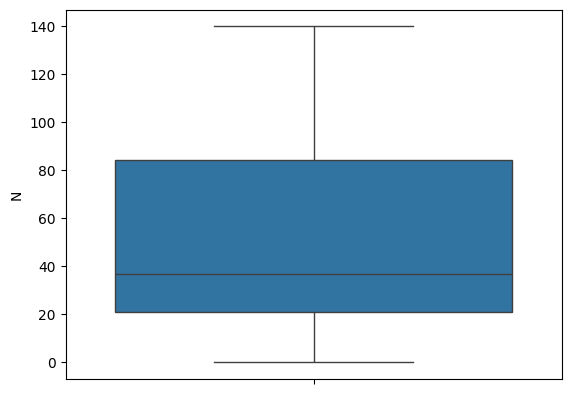

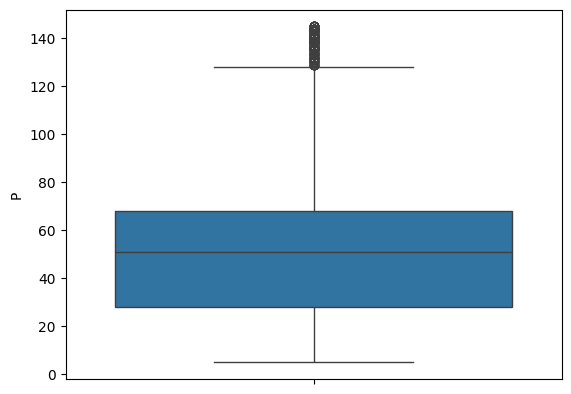

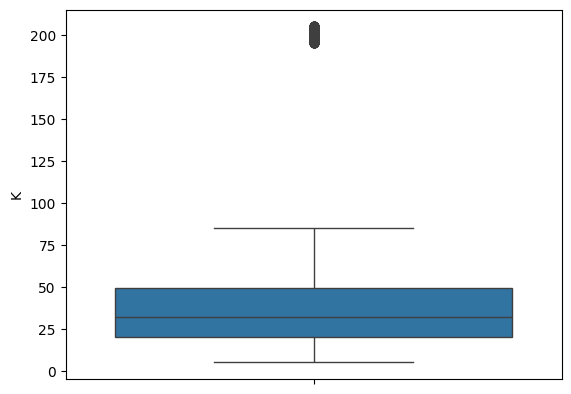

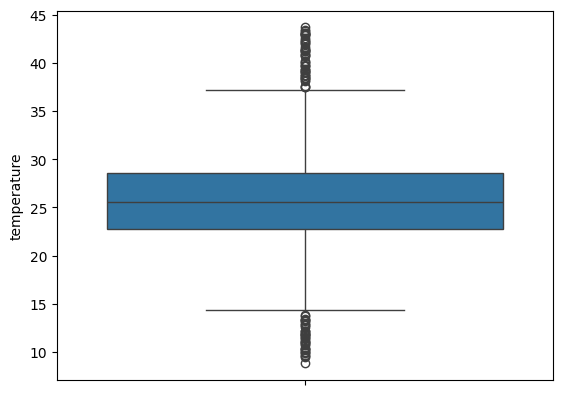

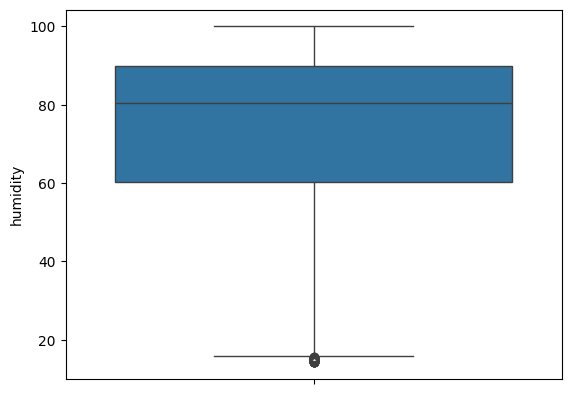

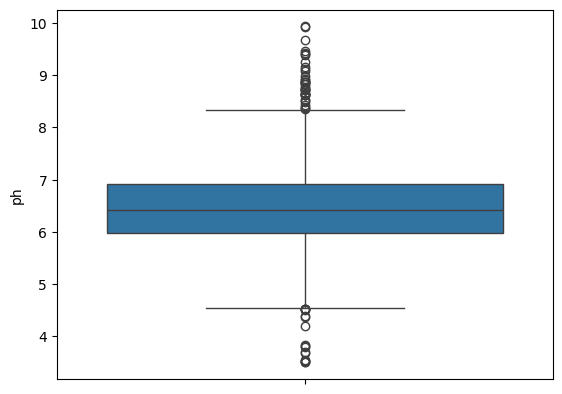

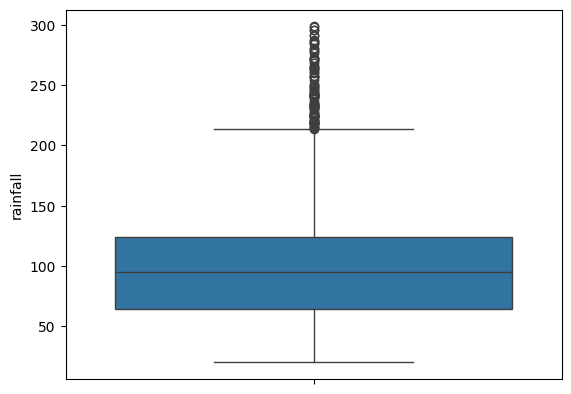

In [ ]:
# checkeing for outliers
for i in df.columns:
  if df[i].dtypes != 'object':
    sns.boxplot(df[i])
    plt.show()

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
# Removing outliers:
from scipy import stats
z_scores=np.abs(stats.zscore(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]))

In [ ]:
cleaned_df= df[~ (z_scores > 3).any(axis=1)]

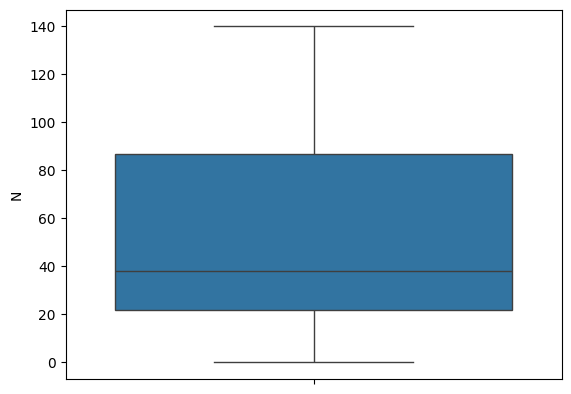

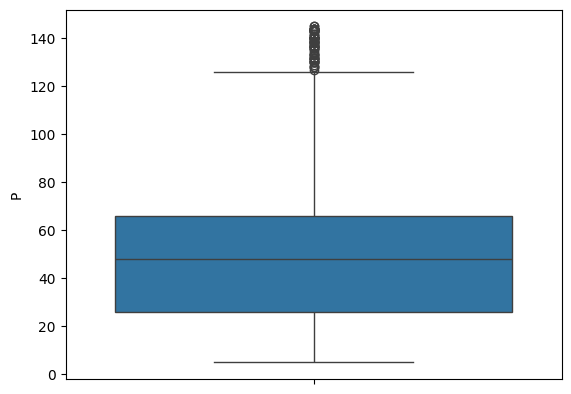

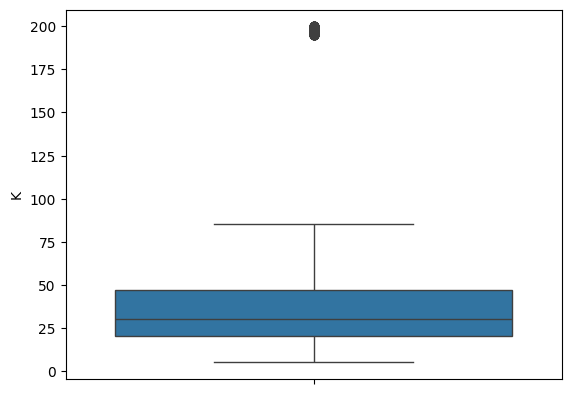

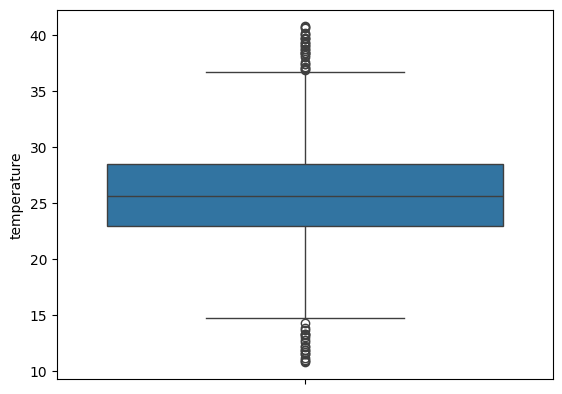

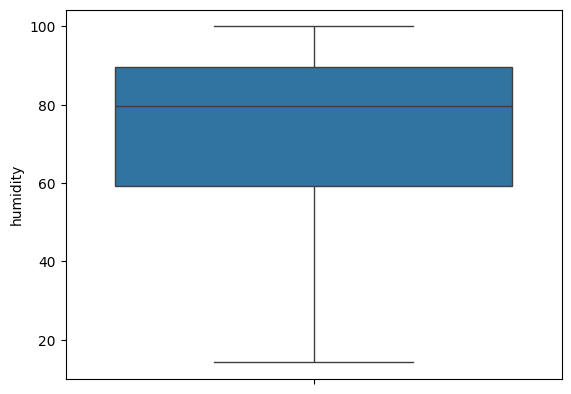

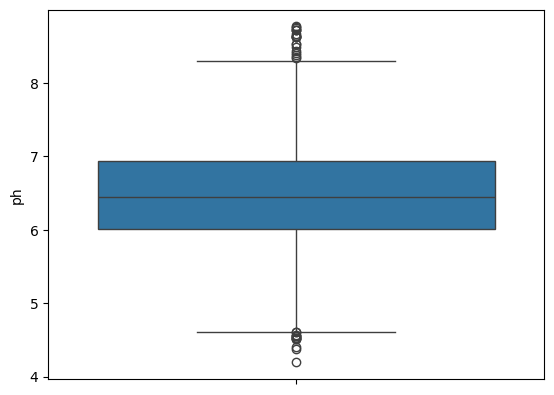

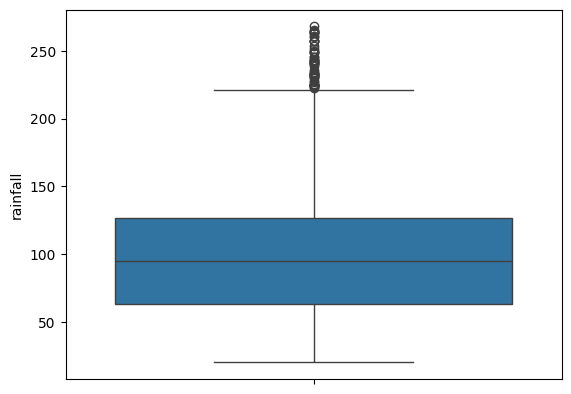

In [ ]:
# checkeing for outliers
for i in cleaned_df.columns:
  if cleaned_df[i].dtypes != 'object':
    sns.boxplot(cleaned_df[i])
    plt.show()

In [ ]:
# No type error.
# No null values.
# No duplicate values.
# No type error.
# Outliers are present.

Splitting of Data

In [ ]:
x=cleaned_df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].copy()
y=cleaned_df['label'].copy()

In [ ]:
x.head(2)

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537


In [ ]:
y.head(2)

,label
0,rice
1,rice


In [ ]:
y.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1853,24,27,34,28.878630,95.113203,6.203377,145.058312
940,39,30,38,20.126449,87.596296,6.965157,108.065579
795,58,73,16,33.369844,65.677182,6.874142,64.895175
593,18,36,23,24.018254,53.766234,7.214079,35.034044
2103,108,24,31,24.128325,56.181077,6.431900,147.275782
...,...,...,...,...,...,...,...
1182,12,27,26,29.093823,45.566106,5.323072,96.235200
1401,114,27,48,27.820548,93.035552,6.528404,26.324055
912,36,7,37,19.867118,86.355902,5.782436,108.316886
1609,13,23,6,23.961476,90.264080,7.365338,102.695870


In [ ]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1463,84,29,49,29.943492,93.907412,6.251420,20.390205
1036,117,79,49,25.409099,82.362081,6.176644,112.979480
911,16,10,41,24.774645,85.636087,6.738994,105.759581
2154,114,27,28,24.994518,57.932502,7.162802,192.873682
1400,115,17,55,27.578269,94.118782,6.776533,28.082532
...,...,...,...,...,...,...,...
944,37,11,36,24.247796,85.560333,6.710143,106.921603
441,8,59,18,29.505230,35.720325,6.216814,187.896185
2014,67,43,38,25.216227,70.882596,7.299305,195.864555
1709,69,64,47,40.211993,94.507669,6.993473,186.676232


In [ ]:
y_train

,label
1853,coconut
940,pomegranate
795,blackgram
593,mothbeans
2103,coffee
...,...
1182,mango
1401,muskmelon
912,pomegranate
1609,orange


In [ ]:
y_test

,label
1463,muskmelon
1036,banana
911,pomegranate
2154,coffee
1400,muskmelon
...,...
944,pomegranate
441,pigeonpeas
2014,jute
1709,papaya


In [ ]:
# Chekcing for stability.
y_train.value_counts()

,count
label,
watermelon,85
mango,85
jute,85
maize,84
blackgram,83
lentil,83
pomegranate,82
pigeonpeas,81
orange,80


Model Training and Evaluation:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=201,oob_score=True)

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=201, oob_score=True)

In [ ]:
print("OOB Score:",model.oob_score_)
print('Accuracy Score:',model.score(x_test,y_test))

OOB Score: 0.9944547134935305
Accuracy Score: 0.9926108374384236


Tesing:

In [ ]:
inp=x_train.loc[1853]
inp

,1853
N,24.000000
P,27.000000
K,34.000000
temperature,28.878630
humidity,95.113203
ph,6.203377
rainfall,145.058312


In [ ]:
model.predict([inp])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['coconut'], dtype=object)

# Model Deployment:

In [ ]:
import joblib

joblib.dump(model, "crop_recommendation_model")

print("Model saved successfully!")


Model saved successfully!


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import joblib
import numpy as np

# Load model
model = joblib.load("crop_recommendation_model")

# If you used scaler, uncomment below
# scaler = joblib.load("scaler.pkl")

def predict_crop(N, P, K, temperature, humidity, ph, rainfall):

    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # If you used scaler, uncomment:
    # input_data = scaler.transform(input_data)

    prediction = model.predict(input_data)[0]

    return f"🌾 Recommended Crop: {prediction}"

# Custom CSS for professional look
custom_css = """
body {
    background: linear-gradient(to right, #11998e, #38ef7d);
}
.gradio-container {
    font-family: 'Segoe UI', sans-serif;
}
"""

with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:

    gr.Markdown(
        """
        # 🌱 Smart Crop Recommendation System
        ### AI-Powered Agricultural Decision Support

        Enter soil and environmental parameters below to get the best crop recommendation.
        """
    )

    with gr.Row():
        with gr.Column():
            N = gr.Number(label="Nitrogen (N)", value=90)
            P = gr.Number(label="Phosphorus (P)", value=42)
            K = gr.Number(label="Potassium (K)", value=43)

        with gr.Column():
            temperature = gr.Number(label="Temperature (°C)", value=20)
            humidity = gr.Number(label="Humidity (%)", value=80)
            ph = gr.Number(label="Soil pH", value=6.5)
            rainfall = gr.Number(label="Rainfall (mm)", value=200)

    predict_btn = gr.Button("🚀 Predict Best Crop", variant="primary")

    output = gr.Textbox(label="Prediction Result")

    predict_btn.click(
        fn=predict_crop,
        inputs=[N, P, K, temperature, humidity, ph, rainfall],
        outputs=output
    )

    gr.Markdown(
        """
        ---
        💡 Model: Random Forest Classifier
        📊 Accuracy: 98%
        🧠 Developed using Scikit-learn
        """
    )

demo.launch()


/tmp/ipython-input-3793617321.py:32: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:
/tmp/ipython-input-3793617321.py:32: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://95f2cc6f81b19dd396.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# THANK YOU